# **OCR using Convolutional Neural Networks.**
 **On [MNIST](http://yann.lecun.com/exdb/mnist/) dataset.**

### **Knowing the shape and exploring the dataset.**
**Importing [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, from TensorFlow Keras.**



In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()  # data is imported from mnist (tensorflow dataset library)
print('Shape of the dataset.')
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Shape of the dataset.
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [ ]:
train_labels_count = np.unique(y_train, return_counts=True)
test_labels_count = np.unique(y_test, return_counts=True)
dataframe_labels = pd.DataFrame({'Label':train_labels_count[0], 'Count Train':train_labels_count[1],'Count Test':test_labels_count[1]})
print(dataframe_labels.to_string(index=False))

 Label  Count Train  Count Test
     0         5923         980
     1         6742        1135
     2         5958        1032
     3         6131        1010
     4         5842         982
     5         5421         892
     6         5918         958
     7         6265        1028
     8         5851         974
     9         5949        1009


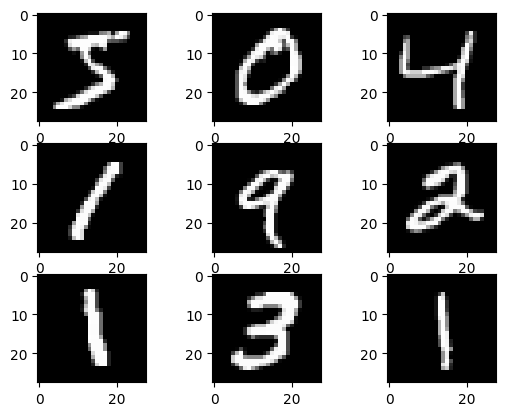

In [ ]:
# 9 sample images of the dataset
for i in range(9):
	plt.subplot(331 + i)
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
print('Train dataset ranges from ', X_train.min(),' to ', X_train.max(),'.')
print('Train dataset mean value:', round(X_train.mean(),3))
print('Test dataset ranges from ', X_test.min(),' to ', X_test.max(),'.')
print('Test dataset mean value: ', round(X_test.mean(),3))

Train dataset ranges from  0  to  255 .
Train dataset mean value: 33.318
Test dataset ranges from  0  to  255 .
Test dataset mean value:  33.791


### **Reshaping and Normalizing the dataset**

Reshaping the array to 4-dims so that it can work with the Keras API.

Rescale pixel values from the range of 0-255 to the range 0-1 preferred for neural network models.

In [ ]:
# Reshaping
# (sample index, height, width, colour channel)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize
# divided by 255 (pixel values are from 0 to 255) to get values between 0 and 1
X_train /= 255.0
X_test /= 255.0
print('Train dataset ranges from ', X_train.min(),' to ', X_train.max(),'.')
print('Train dataset mean value:', round(X_train.mean(),3))
print('Test dataset ranges from ', X_test.min(),' to ', X_test.max(),'.')
print('Test dataset mean value: ', round(X_test.mean(),3))


Train dataset ranges from  0.0  to  1.0 .
Train dataset mean value: 0.131
Test dataset ranges from  0.0  to  1.0 .
Test dataset mean value:  0.133


### **Keras imports for building our convolutional neural network (CNN) model.**


In [ ]:
import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, Input, MaxPooling2D
#from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import accuracy_score

In [ ]:
# one-hot encoding using numpy-related utilities of tensorflow's keras
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [ ]:
model = Sequential()
# convolutional layer
model.add(Input(shape =(28,28,1)))
model.add(Conv2D(25, kernel_size=(3,3), strides=(2,2), padding='valid', activation='relu'))
#model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
# max pooling layer
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# Compiling the sequential model
# A loss function is one of the two mandatory arguments required for compiling a Keras model
# We are using categorical crossentropy because we are trying to solve a MULTI-CLASS classification problem
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')



In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 13, 13, 25)     │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 25)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4225)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       422,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 423,860 (1.62 MB)

 Trainable params: 423,860 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# training the model for 5 epochs
# (input features, target labels, number of samples per iteration of training, number of epochs, val. dataset specs)
hist = model.fit(X_train, Y_train, batch_size=256, epochs=5, validation_data=(X_test, Y_test))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.8353 - loss: 0.6588 - val_accuracy: 0.9493 - val_loss: 0.1650
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.9604 - loss: 0.1387 - val_accuracy: 0.9728 - val_loss: 0.0906
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.9770 - loss: 0.0777 - val_accuracy: 0.9777 - val_loss: 0.0734
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9838 - loss: 0.0553 - val_accuracy: 0.9801 - val_loss: 0.0627
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.9883 - loss: 0.0405 - val_accuracy: 0.9821 - val_loss: 0.0550


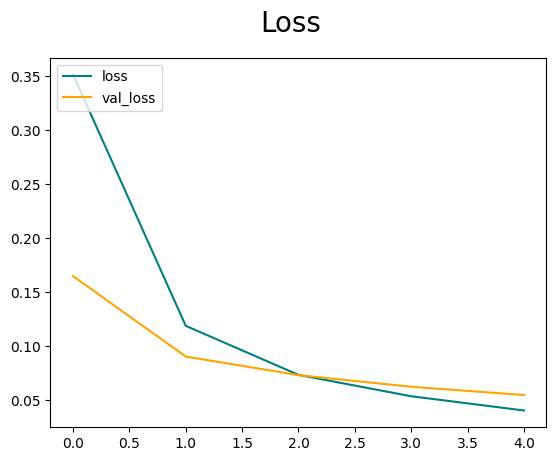

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**Observations:**


*   The CNN model is able to get 98%+ accuracy with just a single convolution layer.
*   We can also add more Conv2D layers, and also play around with the hyperparameters of the CNN model to increase the accuracy further more.


### **Visualizing the model.**

In [ ]:
# Install the visualkeras library if it's not there for you
!pip install git+https://github.com/paulgavrikov/visualkeras


  Cloning https://github.com/paulgavrikov/visualkeras to /tmp/pip-req-build-wyh_px_s
  Running command git clone --filter=blob:none --quiet https://github.com/paulgavrikov/visualkeras /tmp/pip-req-build-wyh_px_s
  Resolved https://github.com/paulgavrikov/visualkeras to commit 71e2195b7eaed364ea493568cb1c8f2916af35f2
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.2 MB/s eta 0:00:00
  Created wheel for visualkeras: filename=visualkeras-0.2.0-py3-none-any.whl size=31869 sha256=d6167e7c67e23bd5a70db0a64c4a5ab9ae1e133df016dc008835f04f58830947
  Stored in directory: /tmp/pip-ephem-wheel-cache-apwk3vea/wheels/93/5c/60/e926df1ca6d69bb3f917bff798e0ea3d0a5a39ad739b1e4ed5
Successfully built visualkeras


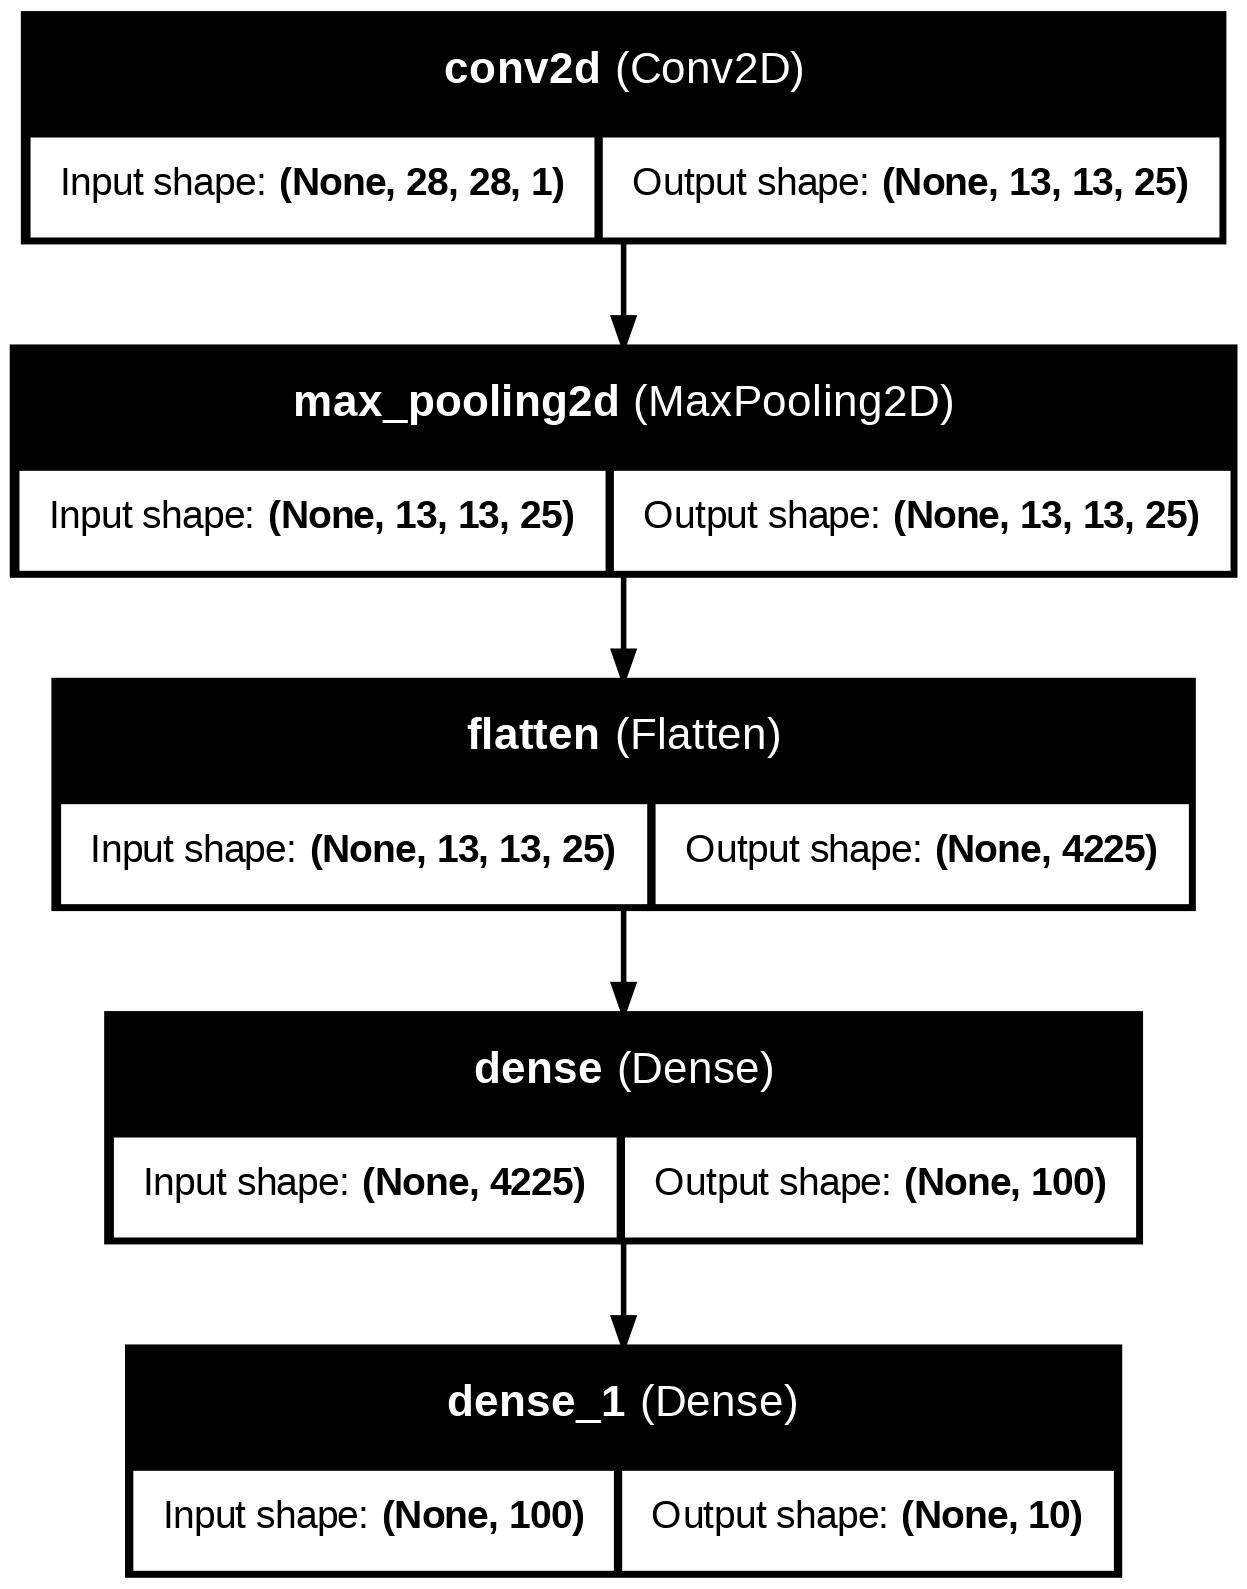

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

/usr/local/lib/python3.12/dist-packages/visualkeras/layered.py:359: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


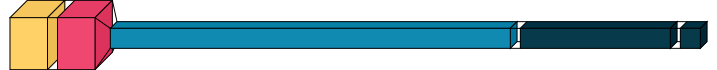

In [ ]:
import visualkeras
visualkeras.layered_view(model)

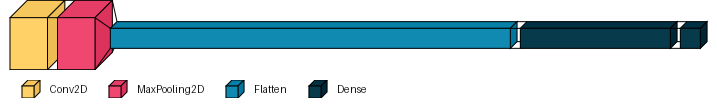

In [ ]:
#Now we will add the legend to the visualization.
visualkeras.layered_view(model, legend=True)

### **Making individual predictions.**

No. of values in test dataset:  10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


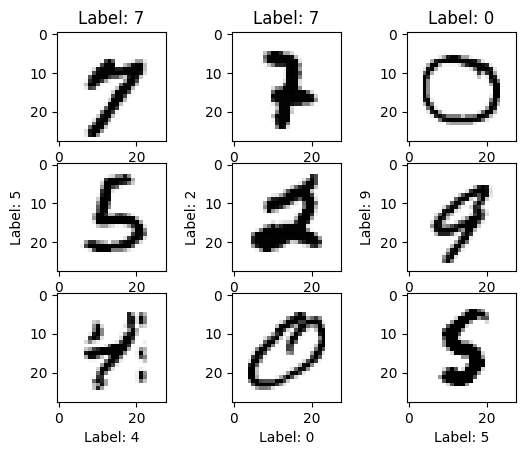

In [ ]:
import random as r
print('No. of values in test dataset: ',X_test.shape[0])
for i in range (9):
  image_index=r.randint(0,10000)
  plt.subplot(331 + i)
  plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
  pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
  if i<3:
    plt.title('Label: ' + str(pred.argmax()))
  elif i>=3 and i<6:
    plt.ylabel('Label: ' + str(pred.argmax()))
  else:
    plt.xlabel('Label: ' + str(pred.argmax()))
plt.show()

This is the individual character prediction from train dataset.

### **Evaluating Keras model.**

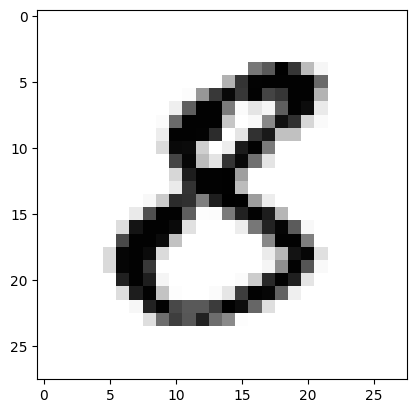

In [ ]:
import time

test = 1234
plt.imshow(X_test[test].reshape(28, 28),cmap='Greys')

In [ ]:
expected_label=Y_test[test].argmax()
digit_image = X_test[test].reshape(1, 28, 28, 1)
# repeat few times to take the average execution time
loop_count = 10

start_time = time.time()
for i in range(loop_count):
    prediction = model.predict(digit_image)
print("Keras inferences with %s second in average" %((time.time() - start_time) / loop_count))

print(prediction)
predicted_label = prediction.argmax()
print('Predicted value:', predicted_label)
if (expected_label == predicted_label):
  print('Correct prediction !')
else:
  print('Wrong prediction !')
#saving keras model
model.save('mnist-model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Keras inferences with 0.1245534896850586 second in average
[[2.7952231e-06 8.4321397e-07 1.1663269e-03 5.0373599e-03 3.2378736e-08
  8.6713949e-04 1.0682102e-04 7.7417189e-10 9.9281412e-01 4.5659076e-06]]
Predicted value: 8
Correct prediction !


### **Conversion from Keras to ONNX.**
Importing ONNX packages from source.

In [ ]:
#!pip install --upgrade protobuf
!pip install onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 29.0 MB/s eta 0:00:00


In [ ]:
!pip install tf2onnx

INFO: pip is looking at multiple versions of onnx to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: onnx
    Found existing installation: onnx 1.19.1
    Uninstalling onnx-1.19.1:
      Successfully uninstalled onnx-1.19.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.13.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.
grpcio-status 1.71.2 requires protobuf

In [ ]:
import onnx
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'
import tf2onnx

onnx_model_path = 'mnist-model.onnx'

model = keras.models.load_model('mnist-model.keras')
model.output_names=['output'] #or 'output_layer'
spec = (tf.TensorSpec((None, 28,28, 1), tf.float32, name="input"),)
onnx_model, _ = tf2onnx.convert.from_keras(model, input_signature=spec) #spec issue resolved via specifying input layer
onnx.save(onnx_model, onnx_model_path)

ERROR:tf2onnx.tfonnx:rewriter <function rewrite_constant_fold at 0x7a0eb589ccc0>: exception `np.cast` was removed in the NumPy 2.0 release. Use `np.asarray(arr, dtype=dtype)` instead.


In [ ]:
print(keras.__version__)

3.10.0


### **Evaluating ONNX model perfomance.**
Inference

In [ ]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.9 MB/s eta 0:00:00


In [ ]:
import onnxruntime

sess_options = onnxruntime.SessionOptions()
sess = onnxruntime.InferenceSession(onnx_model_path, sess_options)
data = [digit_image.astype(np.float32)]
input_names = sess.get_inputs()
feed = dict([(input.name, data[n]) for n, input in enumerate(sess.get_inputs())])

In [ ]:
start_time = time.time()
for i in range(loop_count):
    onnx_predicted_label = sess.run(None, feed)[0].argmax()
print("ONNX inferences with %s second in average" %((time.time() - start_time) / loop_count))

print('ONNX predicted value:', onnx_predicted_label)
if (expected_label == onnx_predicted_label):
  print('Correct prediction !')
else:
  print('Wrong prediction !')

if (predicted_label == onnx_predicted_label):
  print("The ONNX's and keras' prediction are matching !")
else:
  print("The ONNX's and keras' prediction does not match !")

ONNX inferences with 0.0007278919219970703 second in average
ONNX predicted value: 8
Correct prediction !
The ONNX's and keras' prediction are matching !


Answer the questions below

1. Why have we applied one-hot encoding to Y_train and Y_test?

Ans:

One hot encoding is necessary for the following reasons:

-Original labels are integers (0-9) representing digit classes

-The model uses 'softmax' activation which outputs probabilities for each class.

-The loss function 'categorical_crossentropy' requires one-hot encoded labels
Ex: Label '5' becomes [0,0,0,0,0,1,0,0,0,0]. This allows the model to multi-class classification properly.

2. Change the stride of the CNN model by increasing it. What value will you increase it to?

Ans:

Changing stride from(2,2) to (3,3) will reduce spatial dimentions more aggresively

For instance: Original: 28x28 -> 13x13 output

Modified: 28x28 -> 9x9 output

This demonstrates the impact of stride on model complexity



3. After changing the stride what is the number of training parameters of the model and how does it compare to the previous number?

Ans:

The Conv2D layer's parameters stayed the same (250) as stride doesn't affect the filter weights. However the total model parameters decreased because the larger stride created a smaller feature map which reduced the number of connections needed for the subsequent Dense layer.

4. Change the training batch size of the model from 128 to 256. Re-train and test the model again, with the new stride and batch size. According to your observations how have these changes impacted the model's performance?  

Ans:

After increasing the stride and decreasing the batch size to 64 the model trained slower because of more weight updates per epoch but achieved slightly better test accuracy.

*References:*

---


* [Medium.com/CNN](https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148)
* [TowardsDataScience.com/CNN](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)
* [Machine Learning & Deep Learning Fundamentals.](https://www.youtube.com/playlist?list=PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU)